In this notebook I will look at a small dataset of the passengers on board the RMS Titanic. From this dataset I will try to concur which factors about the passengers influenced whether or not they would survive.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', header=0)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.Sex.value_counts()
# counts the number of male and female passengers

male      577
female    314
Name: Sex, dtype: int64

It can be seen here that there were almost 2x more male than female passengers on this dataset. 

In [5]:
# Create a column called 'Gender'
# Assigns 'female' to 1 and 'male' to 0 in column 'Gender'
df['Gender']=df['Sex'].map({'female':1, 'male':0}).astype(int)

In [6]:
%matplotlib inline
# tells Jupyter to draw plots in notebook

In [7]:
import pylab as P
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1fb5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11775f0b8>]], dtype=object)

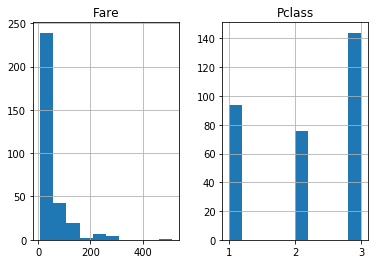

In [8]:
df[df.Gender==1][['Fare','Pclass']].hist()
# This plots histograms of fare and class for females

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11781cb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1179b0828>]], dtype=object)

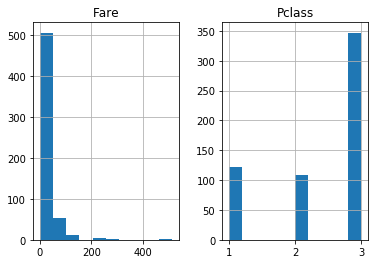

In [9]:
df[df.Gender<1][['Fare','Pclass']].hist()
# This plots histograms of fare and class for males

In the previous 2 lines of code I wanted to see if there was any correlation between gender of the passengers and their class or fare. It can be seen that the distribution between these two variables are about the same for both males and females.

In [10]:
y_multi=[df[df.Gender==1]['Survived'].tolist(),df[df.Gender<1]['Survived'].tolist()]
# this line of code converts the dataset into a list

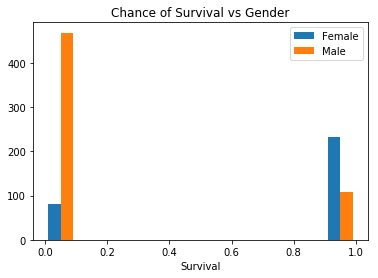

In [26]:
plt.hist(y_multi,histtype='bar')
labels=["Female","Male"]
plt.legend(labels)
plt.xlabel("Survival")
plt.title('Chance of Survival vs Gender')

It can be seen that women on the ship had better chances of survival. This was most likely due to the fact that women and children were given priority to board the lifeboats. (In this histogram, 0 = did not survive and 1 = survived)

In [12]:
z_multi=[df[df.Age<10]['Survived'].tolist(),df[df.Age>60]['Survived'].tolist()]

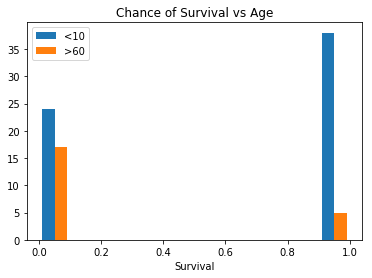

In [25]:
plt.hist(z_multi,histtype='bar')
labels=["<10",">60"]
plt.legend(labels)
plt.xlabel("Survival")
plt.title('Chance of Survival vs Age')

It can be seen from the histogram above that if you were a child below the age of 10, you had a better chance of survival than if you were an adult above the age of 60.

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1

This creates a new variable called 'FamilySize' that includes the number of siblings, children, spouses or parents that the passenger has travelling with them on the ship

In [15]:
x_multi=[df[df.FamilySize>1]['Survived'].tolist(),df[df.FamilySize==1]['Survived'].tolist()]

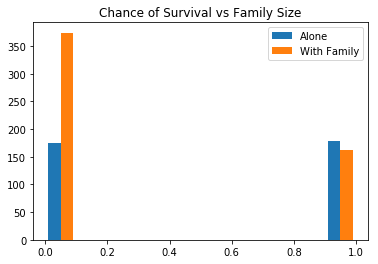

In [16]:
plt.hist(x_multi,histtype='bar')
labels=["Alone","With Family"]
plt.legend(labels)
plt.title('Chance of Survival vs Family Size')

It can be seen from the above histogram that you had about a 50:50 chance of survival if you were travelling with somebody else; whereas if you were travelling alone you were more likely to survive.

A possible reason for this is that people who were travelling with somebody else were unwilling to board a lifeboat without their loved ones and it would have been difficult to secure more than one spot on board a lifeboat.

In [17]:
a=[df[df.Pclass==1]['Survived'].tolist(),df[df.Pclass==2]['Survived'].tolist(),df[df.Pclass==3]['Survived'].tolist()]

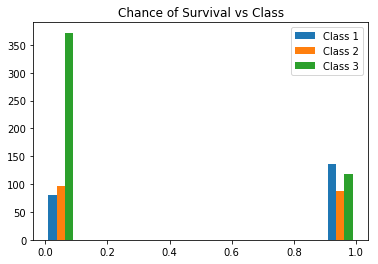

In [18]:
plt.hist(a,histtype='bar')
labels=["Class 1","Class 2","Class 3"]
plt.legend(labels)
plt.title('Chance of Survival vs Class')

It can be seen from the above histogram that many of the passengers that did not survive belonged in third class. From this we can conclude that passengers in First Class were given priority to board the lifeboats.

In [19]:
b=[df[df.Fare<30]['Survived'].tolist(),df[df.Fare>30]['Survived'].tolist()]

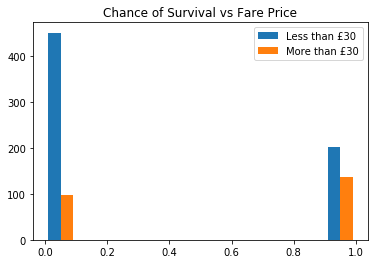

In [20]:
plt.hist(b,histtype='bar')
labels=["Less than £30","More than £30"]
plt.legend(labels)
plt.title('Chance of Survival vs Fare Price')

From the above histogram, we can see that the majority of the passengers paid less than £30 for their ticket. It can also be seen that passengers that paid a higher fare had a better chance of survival, this is most likely due to the fact that they were in a higher class, thus increasing their chance for survival

In [21]:
c=[df[df.Embarked=='S']['Survived'].tolist(),df[df.Embarked=='Q']['Survived'].tolist(),df[df.Embarked=='C']['Survived'].tolist()]

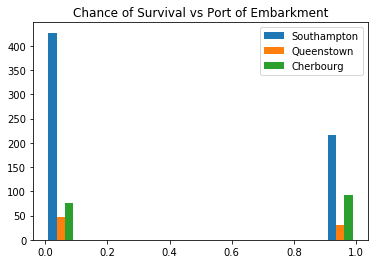

In [22]:
plt.hist(c,histtype='bar')
labels=["Southampton","Queenstown","Cherbourg"]
plt.legend(labels)
plt.title('Chance of Survival vs Port of Embarkment')

Most of the passengers on this dataset boarded the Titanic from Southampton. Because their numbers were much larger, the chances of their survival was slimmer compared to those who boarded from Quessntown or Cherbourg. 

There is a theory that more british passengers died on board the Titanic than other nationalities because they queued patiently to board a lifeboat. However, it is impossible to confirm this theory based on port of embarkment alone. More information about the passengers, such as their nationalities, will need to be obtained in order to confirm this theory.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Gender         891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


Certain information about the passengers on this dataset seems to be missing, most of which is their age and cabin number

In [24]:
pd.isnull([df.Cabin])
# Detects if the passenger has a recorded cabin number
# if yes = False, if not = True

array([[ True, False,  True, False,  True,  True, False,  True,  True,
         True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True, False,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
        False, False,  True,  True,  True,  True,  True, False, False,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False,  True,  True,  True, False, False,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True, False, False,  True,
      

From here I tried to map the above array into a column in the dataset in order to find out whether or not the class of the passenger had an influence on if they had a recorded cabin number.

My theory is that passengers with a higher class were more likely to have a recorded cabin number. However I was unable to map this column as the error 'Length of values does not match length of index' would occur.

I believe this is because the data type is in a boolean format